Matplotlib color list :  https://jrc-park.tistory.com/155  
Matplotlib, pyplot, pylab의차이 : https://kongdols-room.tistory.com/72

- SeaBorn  
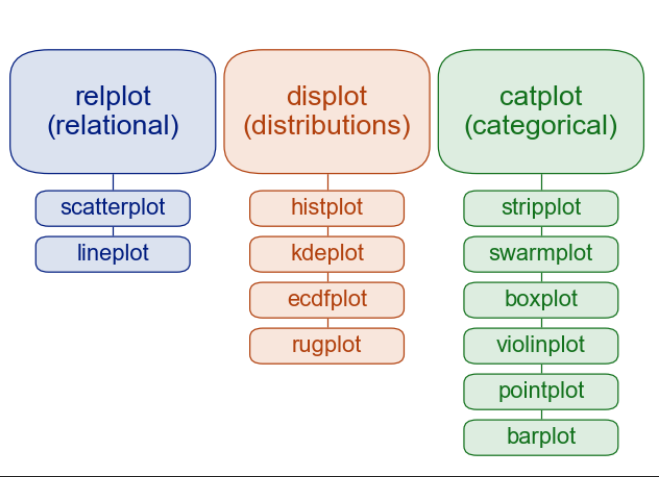

In [40]:
# !pip install seaborn

In [41]:
import numpy as np # Numpy(넘파이) 패키지 임포트
import pandas as pd # Pandas(판다스) 패키지 임포트
import matplotlib.pyplot as plt # Matplotlib(맷플롯립) 패키지의 pyplot 모듈을 plt로 임포트
import seaborn as sns # Seaborn(씨본) 패키지 임포트
import scipy
from matplotlib import rcParams # 한글 설정을 위한 pcRarams import
# 한글 환경 설정, 할때마다 실행 해줘야함
# 항상 되는 것은 아님(안될 때도 있음)
def setting_styles_basic():
    rcParams['font.family'] = ['Malgun Gothic'] # windows 
    # rcParams['font.family'] = 'AppleGothic' # Mac
    rcParams['axes.unicode_minus']='False' # 한글 font 사용 시, - 기호가 깨지는 현상 방지
setting_styles_basic()

# 경고창무시
import warnings
warnings.filterwarnings('ignore')

In [42]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') # matplotlib의 설정을 변경하는 함수
# 첫 번째 인자로는 설정을 변경할 대상을 지정하고,
# 두 번째 인자로는 설정값을 입력

In [43]:
# 스케일 조정-> sns.set_context 함수를 이용해 설정
import seaborn as sns
sns.set_context('paper', # notebook, talk, poster
                rc={'font.size':15, 
                    'xtick.labelsize':15, # 값을 높이면 x축 눈금 레이블의 글자 크기가 커짐
                    'ytick.labelsize':15, 
                    'axes.labelsize':15}) # 그래프의 축 이름과 범례 등의 글자 크기를 조절할 수 있음
# sns.set_context() 함수를 사용하여 그래프의 크기와 레이아웃을 'paper'로 설정
# paper 옵션은 A4 용지 크기에 가까운 세로 방향의 그래프 크기와 레이아웃을 설정
# 'notebook', 'talk', 'poster' 등의 다양한 값을 지정할 수 있음
# rc 매개변수를 사용하여 폰트와 레이블의 크기를 설정하였음
# 'font.size', 'xtick.labelsize', 'ytick.labelsize', 'axes.labelsize' 의
# 키를 사용하여 폰트와 레이블의 크기를 설정

In [44]:
df_titanic = sns.load_dataset('titanic')    # 타이타닉호 데이터
df_iris = sns.load_dataset('iris')          # 붓꽃 데이터
df_penguins = sns.load_dataset('penguins')  # 펭귄 데이터
df_tips = sns.load_dataset('tips')          # 팁 데이터
df_diamonds = sns.load_dataset('diamonds')  # 다이아몬드 데이터
df_planets = sns.load_dataset('planets')    # 행성 데이터
df_flights = sns.load_dataset('flights')    # 비행 데이터

from sklearn.datasets import load_wine      
wine_data = load_wine()
df_wines = pd.DataFrame(data=wine_data.data, # 와인 데이터
                       columns=wine_data.feature_names)

- 다변량 데이터 : 변랑이 2개인 이변량 데이터와 변량이 3개 이상인 데이터를 포함함
- 다변랑 데이터를 그래프로 표현할 때는 색상으로 구분하는 hue,  
캔버스로 구분하는 col, 점크기로 구분하는 size 등의 파라미터를  
이용해 시각화 차원을 넓혀나갈 수 있음

axis: æk.sɪs  / axes: ˈæk.siːz

- 다차원 데이터 시각화 : 범주형
1. 병렬 막대 그래프
- 두 변량에 대한 빈도 막대그래프 2개를 각각 캔버스(canvas)에 병렬로 나열한 그래프.
  - 병렬 빈도 막대그래프를 그리려면 sns.catplot 함수에 kind='conut와 col 옵션을 추가
    sns.count 함수로는 병렬 막대그래프를 그릴 수 없음.

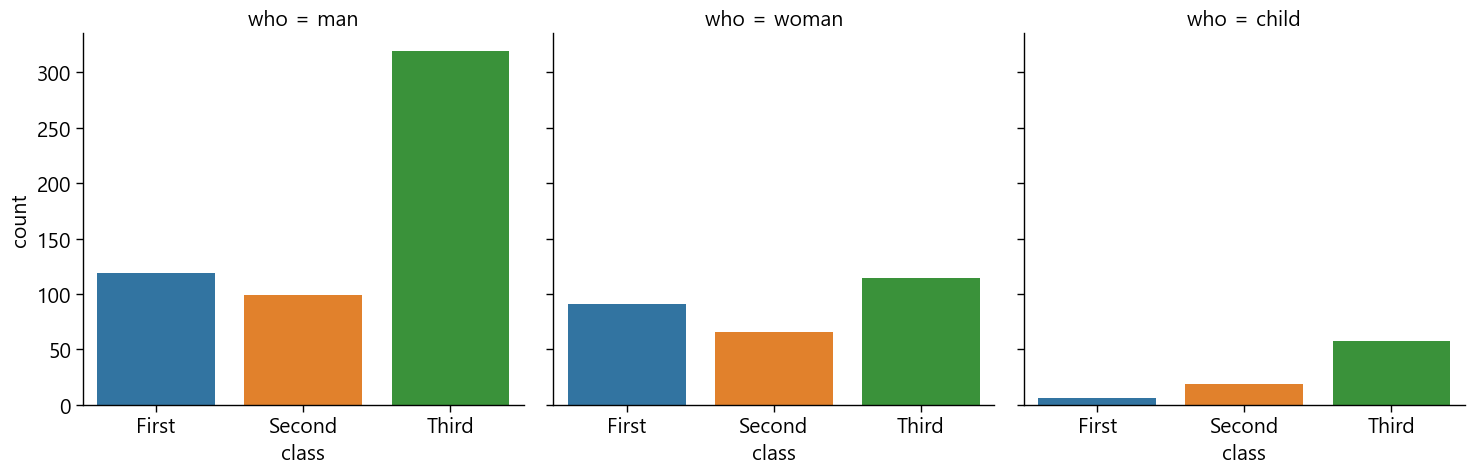

In [45]:
sns.catplot(x= 'class', # x='class': x축에는 선실 등급(class)을 사용
            col= 'who', # who열은 성별 열이며, 이를 기준으로 캔버스를 나누어 성별에 따른 막대 그래프를 그림
            kind= 'count', # kind='count': 빈도를 나타내는 막대 그래프를 그림
            data= df_titanic)

- 다중 막대 그래프
  - 다중 막대그래프는 sns.countsplot() 또는 sns.catplot()에  
  hue 파라미터를 설정해서 그 수 있음, hue 옵션은 변량을 색상으로 구분하는 파라미터

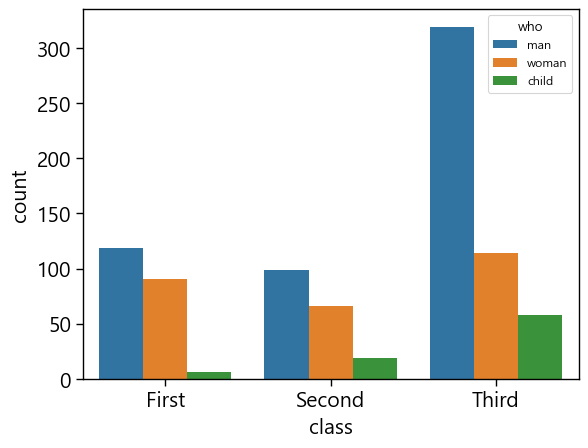

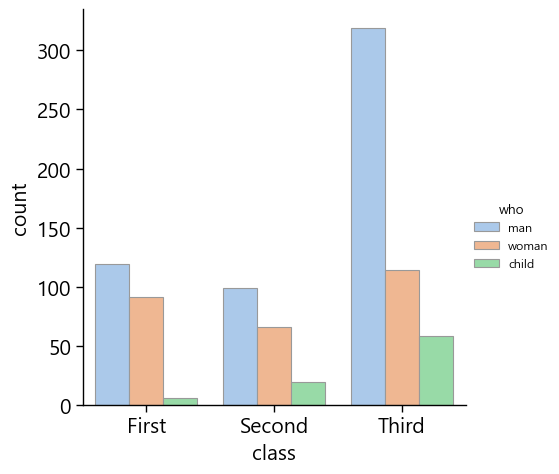

In [46]:
sns.countplot(x='class', hue='who', data= df_titanic) # hue 색상으로 구분하여 시각화하는 함수
# 각 클래스(class)별 성별(who) 승객 수를 막대그래프로 나타냄
# x 인수는 x축에 사용할 데이터 열을 지정, hue 인수는 범주형 변수(who)를 기준으로 데이터를 분할

sns.catplot(x='class', hue='who', kind='count', palette= 'pastel',
            edgecolor= '.6', data= df_titanic)
# sns.catplot() 함수를 이용하여 범주형 데이터를 시각화 (범주: 카테고리)
# kind='count'는 각 범주별 개수(count)를 시각화한다는 것을 의미
# kind는 원하는 그래프 입력(point, bar, box, violin, strip 등등)


- sns.histplot 함수에 multiple='dodge' 옵션을 주어도 다중 막대그르프를 그릴 수 있음
- sns.histplot 함수는 수치형 자료를 히스토그램으로 만들 때 사용하는 함수이지만,
    히스토그램 막대 사이에 간격을 주고 x축 눈금을 없애면 히스토그램을 일반 막대그래프처럼 만들 수 있음
    

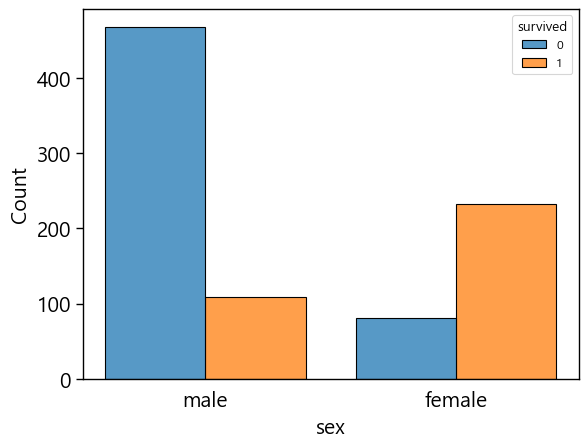

In [47]:
ax= sns.histplot(x= 'sex', hue= 'survived', multiple= 'dodge',
                 shrink=.8, data= df_titanic) #shrink는 각 히스토그램의 너비(간격) 조정
# hue는  범주형 변수(survived)를 기준으로 데이터를 분할
# multiple는 범주형 데이터를 구분하는 방법을 지정하는데,
# dodge를 사용하여 각 범주의 히스토그램을 나란히 그리도록 함
ax.tick_params(bottom=False) # X 축 눈금 숨기기, left는 y축

- 수평 다중 막대그래프
  - 수평 다중 막대그래프를 그리고 싶다면 수직 다중 막대그래프를 그릴 때 사용한 함수에  
    x 파라미터 대신, y 파라미터를 사용

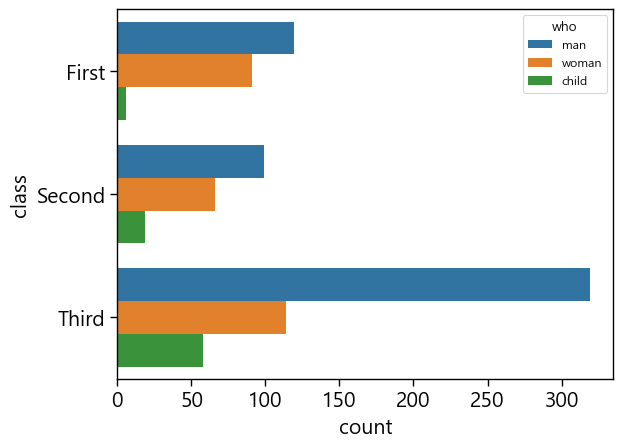

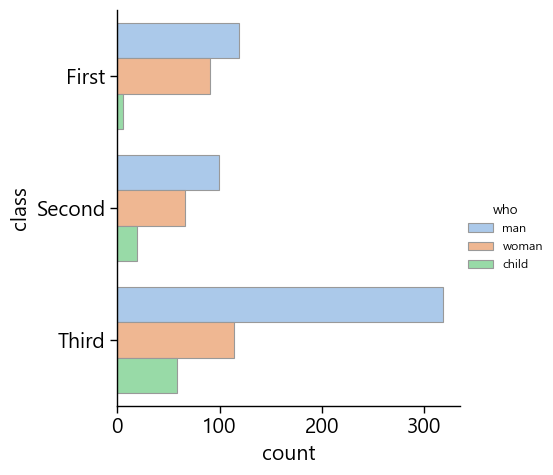

In [48]:
sns.countplot(y= 'class', hue= 'who', data= df_titanic)
sns.catplot(y= 'class', hue='who', kind='count', palette= 'pastel',
            edgecolor= '.6', data= df_titanic)
# hue는 범주형 변수를 기준으로 데이터를 분할,  kind는 그래프 모양

- 누적 막대그래프
  - SeaBorn으로 누적 막대그래프를 만들려면 sns.hitsplot 함수에  
    multiple='stack' 옵션을 주면 됨. 


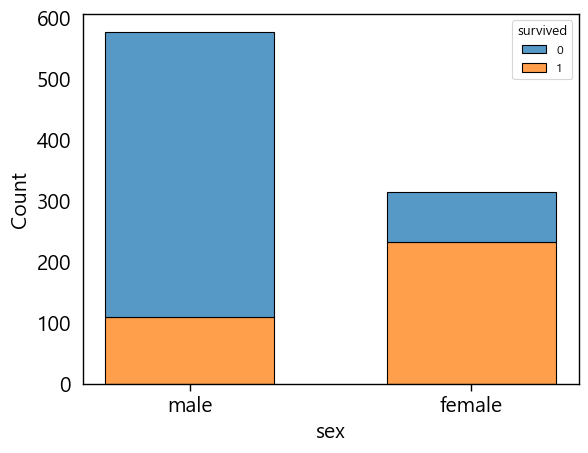

In [49]:
ax= sns.histplot(x= 'sex', hue='survived', multiple= 'stack', shrink=.6, data= df_titanic)
# multiple은 두 범주를 중첩(stack)하여 나타낼지, 나란히(dodge) 나타낼지를 선택할 수 있음
ax.tick_params(left=False)  # y 축 눈금 숨기기(bottom은 x축)

- 수평 누적 막대그래프를 그리려면 x파라미터 대신, y파라미터를 사용

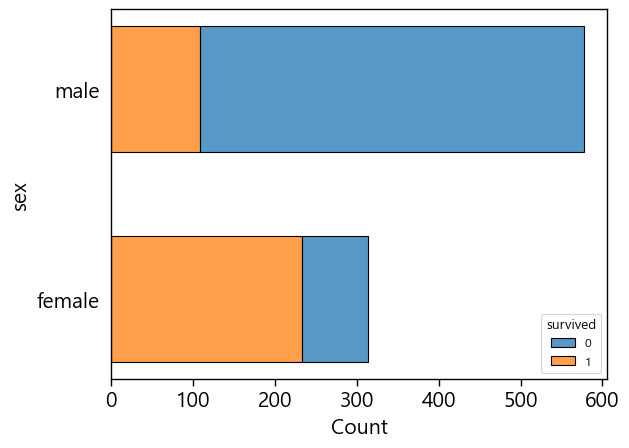

In [50]:
ax= sns.histplot(y= 'sex', hue='survived', multiple= 'stack', shrink=.6, data= df_titanic)
# multiple은 두 범주를 중첩(stack)하여 나타낼지, 나란히(dodge) 나타낼지를 선택할 수 있음
ax.tick_params(left=False)  # y 축 눈금 숨기기(bottom은 x축)

In [51]:
# !pip install statsmodels

(<Figure size 640x480 with 1 Axes>,
 {('female', '1'): (0.0, 0.0, 0.3506597204772992, 0.7395729733161224),
  ('female', '0'): (0.0,
   0.7428952324523349,
   0.3506597204772992,
   0.2571047675476649),
  ('male', '1'): (0.3556348448554087,
   0.0,
   0.6443651551445913,
   0.18828054376802913),
  ('male', '0'): (0.3556348448554087,
   0.19160280290424175,
   0.6443651551445913,
   0.8083971970957582)})

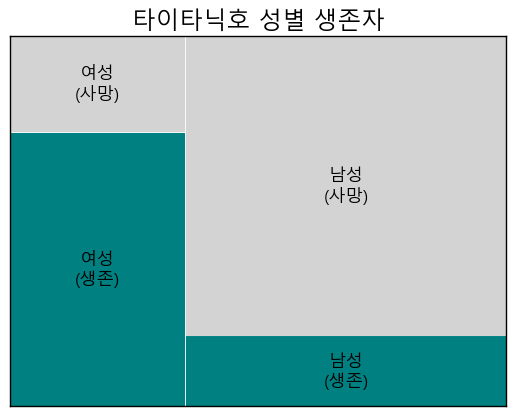

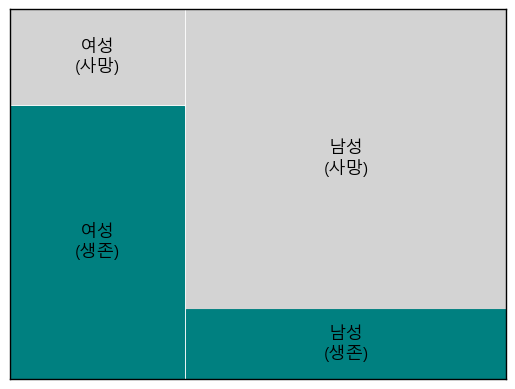

In [52]:
from statsmodels.graphics.mosaicplot import mosaic
# statsmodels 라이브러리에서 제공하는 mosaicplot 함수를 import
import matplotlib.pyplot as plt # pyplot

props = lambda key: {'color': 'teal' if '1' in key else 'lightgray'}
# '1'이 key값에 포함되어 있으면 'teal' 색상, 없으면 'lightgray' 색상을 반환
labelizer = lambda k: {('female','1'): '여성\n(생존)', ('female','0'): '여성\n(사망)',
                        ('male','1'): '남성\n(생존)', ('male', '0'): '남성\n(사망)'}[k]
# labelizer 함수는 k라는 키값에 따라 딕셔너리에 저장된 문자열 값을 반환,
# 딕셔너리에서 k에 해당하는 값을 가져오기 위해 [k] 사용
mosaic(df_titanic.sort_values('sex'), ['sex', 'survived'], properties=props,
       labelizer=labelizer, axes_label=False) # axes_label 전체(x,y)축 레이블 숨기기
# sort_values('sex') 정렬한 후 입력, 이유는 모자이크 그래프에서 각 칸의 크기를 계산할 때,
# 각 칸의 크기는 해당하는 빈도수를 가지고 계산되기 때문
# ['sex','survived] 그래프로 보여줄 두 개의 범주형 변수를 입력.
# props는 함수는 각 칸의 색상을 지정하는 데 사용, key를 입력하면 해당하는 색상을 반환
# labelizer 함수는 각 칸에 들어갈 라벨을 정의하는 데 사용, k를 입력하면 해당하는 라벨을 반환
plt.title('타이타닉호 성별 생존자', fontsize=17) # 제목 내용 및 글자 크기 설정

mosaic(df_titanic.sort_values('sex'), # mosaic 함수를 이용하여 모자이크 플롯을 그림
       ['sex', 'survived'], 
       properties=props, # 색상 변경
       labelizer=labelizer, # 각 타일에 적절한 레이블을 지정
       axes_label=False) # 전체(x,y)축 레이블 숨기기


- 다차원 데이터 시각화: 수치형
  - 점 그래프
    - 점 그래프는 데이터를 점으로 나타난 도표
    - 점 그래프를 이용하면 실제 위치와 분포를 한 눈에 파악 가능
    - Seaborn에서 점 그래프를 그리는 기본 함수는 sns.stripplot

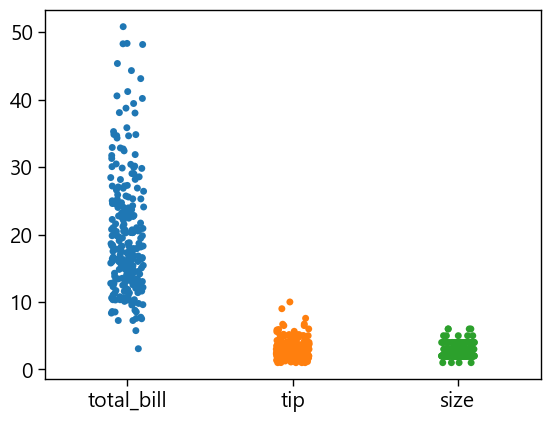

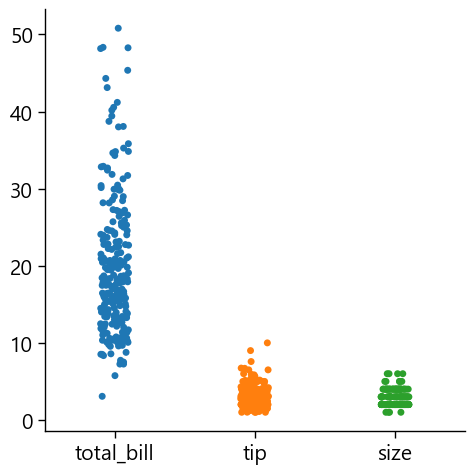

In [53]:
sns.stripplot(data= df_tips) # 점 그래프
sns.catplot(kind= 'strip', data= df_tips)

- sns.stripplt 함수에 jitter 옵션을 추가하면 데이터포인트를 일렬로 그릴 수 있음
  - jitter: 지터는 데이터 값에 약간의 노이즈를 추가함  
    노이즈를 추가하면 데이터 값이 조금씩 움직여서 같은 값을 가지는 데이터가 
    그래프에 여러번 겹쳐서 표시되는 현상을 막아줌

<Axes: xlabel='total_bill', ylabel='smoker'>

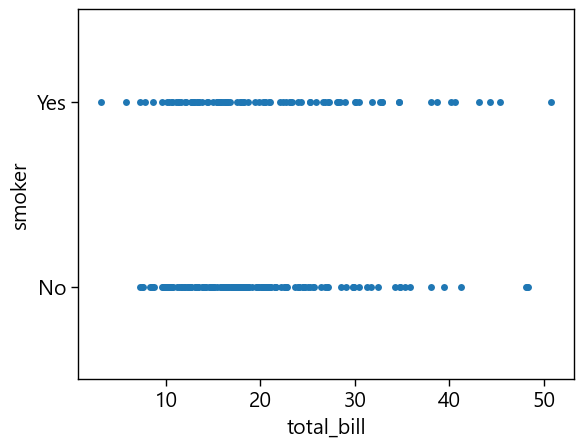

In [55]:
sns.stripplot(x= 'total_bill', y= 'smoker', jitter= False, data= df_tips)

<Axes: xlabel='total_bill', ylabel='smoker'>

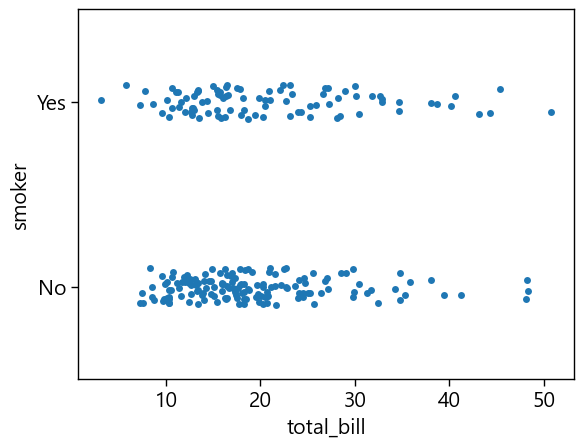

In [56]:
sns.stripplot(x= 'total_bill', y= 'smoker', jitter= True, data= df_tips)

- 데이터 포인트가 서로 겹치는 것을 방지하려면 dodge= True 옵션 사용
  - dodge=True 옵션을 sns.stripplot() 함수에 사용하면, hue 옵션으로 지정한 변수를  
  기준으로 두 개의 범주를 구분하여 분포를 시각화함  

  hue='sex'로 설정하면, x축에는 total_bill 값에 따른 점들이 그려지고,  
  각 점들은 성별에 따라 색상이 다르게 표시됨. dodge=True로 설정하면,  
  남성과 여성의 점들이 겹치지 않고 각각의 그룹으로 나뉘어져서 시각화

<Axes: xlabel='tip', ylabel='day'>

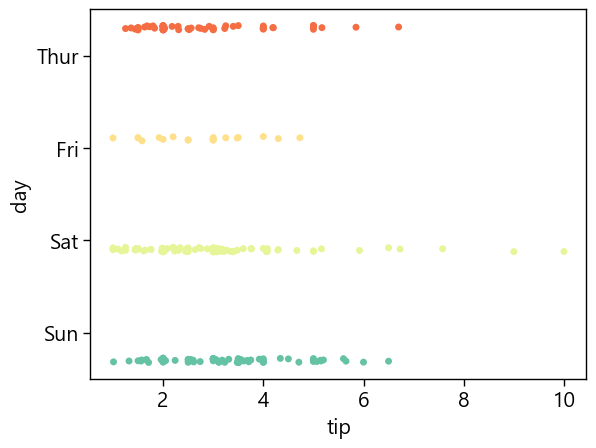

In [57]:
sns.stripplot(x='tip',y='day', palette= 'Spectral', dodge= True, data = df_tips)

<Axes: xlabel='tip', ylabel='day'>

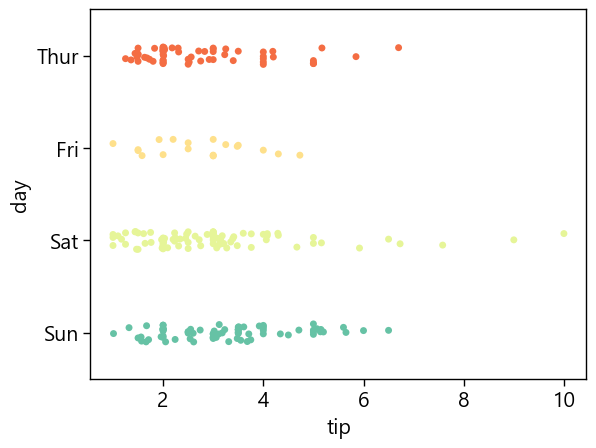

In [58]:
sns.stripplot(x='tip',y='day', palette= 'Spectral', dodge= False, data = df_tips)

- swarmplot
  - swarmplot 함수를 이용하면 점도표의 데이터포인트를 떼(swarm)처럼  
무리를 만들어 데이터포인트가 중첩되는 문제를 해결할 수 있음.

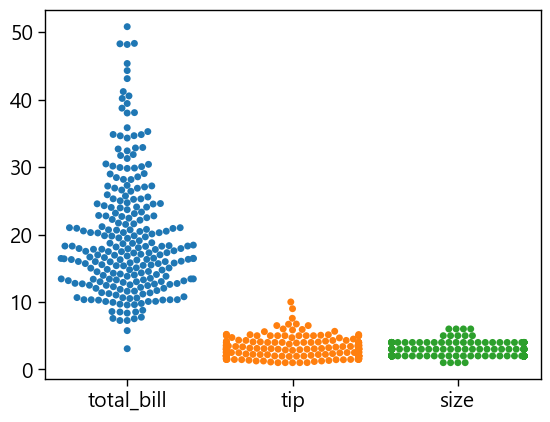

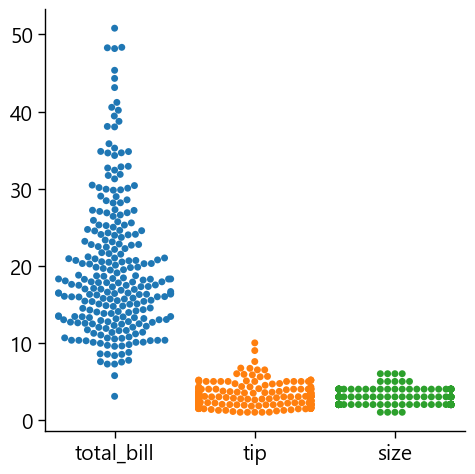

In [59]:
sns.swarmplot(data=df_tips)
#또는
sns.catplot(kind='swarm', data=df_tips)

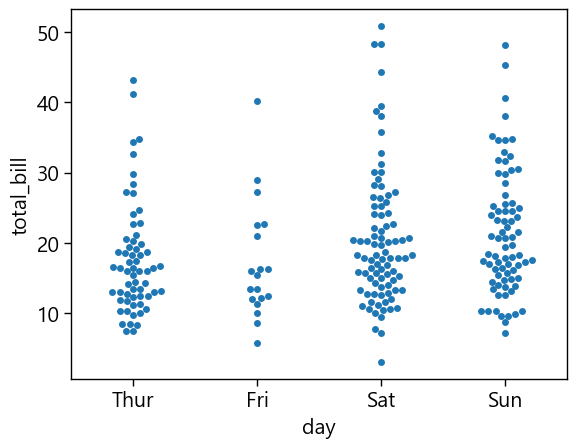

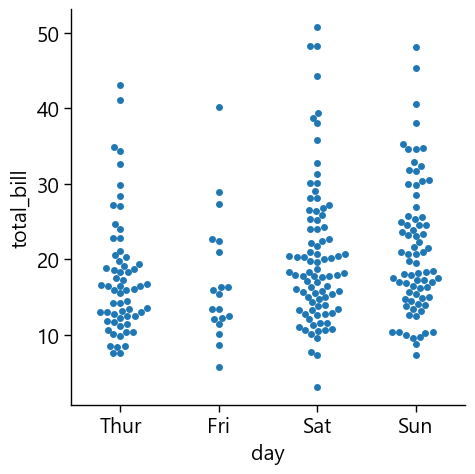

In [60]:
# x와 y파라미터를 사용하면 각 변수에 대한 떼 플롯을 만들 수 있음
sns.swarmplot(x='day', y='total_bill', data=df_tips)
# #또는
sns.catplot(x='day', y='total_bill', kind='swarm', data=df_tips)

2) 선분 그래프
    - 실수 데이터의 분포를 선분으로 표현하고 싶다면 sns.rugplot 함수를 이용하면 됩니다. sns.rugplot은 데이터포인트를 각 축 위에 보여줍니다.

<Axes: xlabel='total_bill', ylabel='tip'>

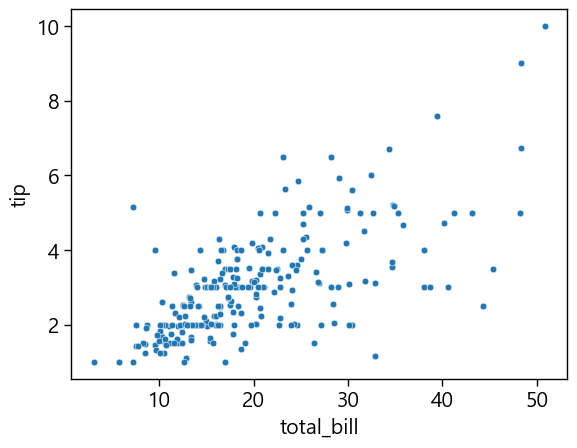

In [62]:
tips= sns.load_dataset("tips")
sns.scatterplot(data=tips, x='total_bill', y='tip')